C:\Users\fortu\AppData\Local\Temp\ipykernel_14156\2590785236.py:160: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




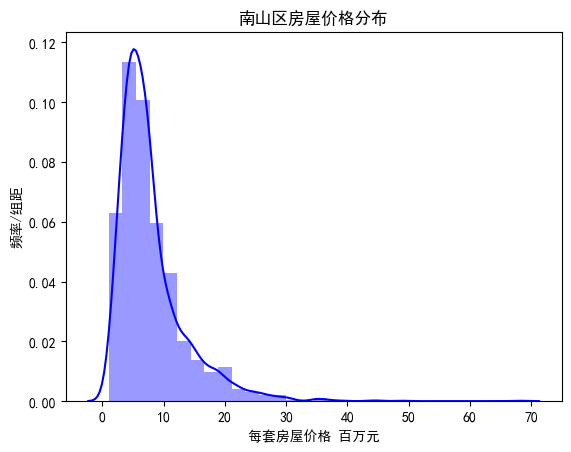

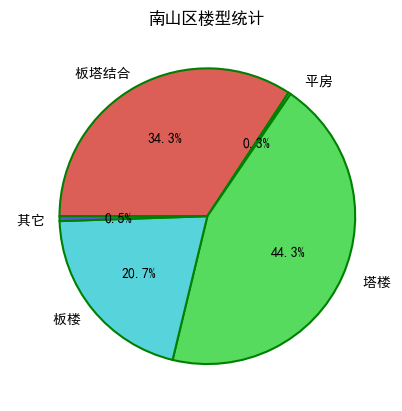

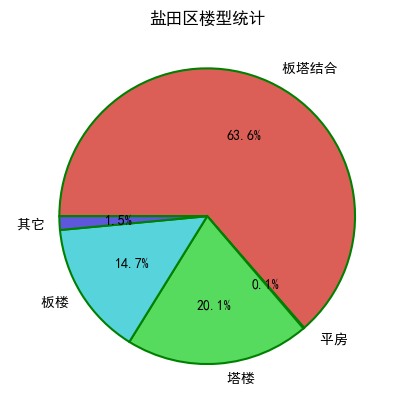

C:\Users\fortu\AppData\Local\Temp\ipykernel_14156\2590785236.py:160: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




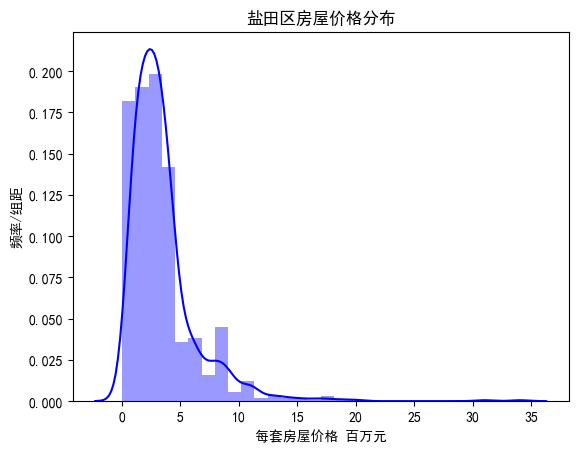

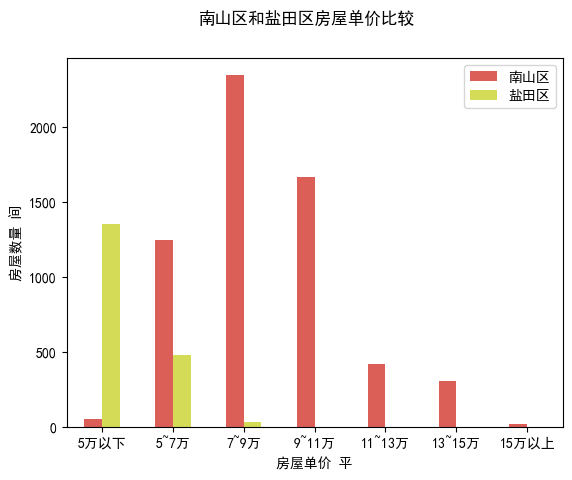

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import seaborn as sns
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType
from pyecharts import options as opts
from pyecharts.faker import Faker
from pyecharts.charts import Line

# Prevent garbled characters in Chinese
plt.rcParams['font.sans-serif'] = ['SimHei']

class House:
    file, Square, UnitPrice, HouseType, Room, name, TotalPrice = None, None, None, None, None, None, None
    RoomType_Percent, HouseType_Director, HouseType_Percent, UnitPricePercent, UnitPriceScope, UnitPricePercent2 = None, None, None, None, None, None

    def __init__(self, filepath, name):
        file = pd.read_csv(filepath)
        self.Square = file.loc[:, 'Square']
        self.UnitPrice = file.loc[:, 'UnitPrice']
        self.HouseType = file.loc[:, 'HouseType']
        self.Room = file.loc[:, 'Room']
        self.name = name
        self.TotalPrice = np.arange(len(self.Square))
        for i in range(len(self.Square)):
            self.TotalPrice[i] = self.Square[i] * self.UnitPrice[i]
            self.TotalPrice[i] /= 1000000
        self.UnitPricePercent2 = [0, 0, 0, 0, 0, 0, 0]
        self.RoomType_Percent = {'一室': 0, '二室': 0, '三室': 0, '四室': 0, '五室': 0, '五室以上': 0}
        self.HouseType_Director = {' 板塔结合': 0, ' 平房': 0, ' 塔楼': 0, ' 板楼': 0, ' 暂无数据': 0, ' 独栋别墅 ': 0,
                              ' 联排别墅 ': 0, ' 叠拼别墅 ': 0, ' 双拼别墅 ': 0}
        self.HouseType_Percent = {' 板塔结合': 0, ' 平房': 0, ' 塔楼': 0, ' 板楼': 0, ' 其它': 0}
        self.UnitPricePercent = {'<50000': 0, '50000~70000': 0, '70000~90000': 0, '90000~110000': 0, '110000~130000': 0,
                            '130000~150000': 0, '>150000': 0}
        self.UnitPriceScope = ['5万以下', '5~7万', '7~9万', '9~11万', '11~13万', '13~15万', '15万以上']

    def housetype_percent(self):
        # Count the room types and calculate the proportions
        for i in range(len(self.HouseType)):
            self.HouseType_Director[self.HouseType[i]] += 1
        size = len(self.HouseType)
        self.HouseType_Percent[' 板塔结合'] = self.HouseType_Director[' 板塔结合'] / size
        self.HouseType_Percent[' 平房'] = self.HouseType_Director[' 平房'] / size
        self.HouseType_Percent[' 塔楼'] = self.HouseType_Director[' 塔楼'] / size
        self.HouseType_Percent[' 板楼'] = self.HouseType_Director[' 板楼'] / size
        self.HouseType_Percent[' 其它'] = (self.HouseType_Director[' 暂无数据'] + self.HouseType_Director[
            ' 独栋别墅 '] + self.HouseType_Director[' 联排别墅 '] + self.HouseType_Director[' 叠拼别墅 '] +
                                           self.HouseType_Director[' 双拼别墅 ']) / size

    # Single-zone building scale
    # pie chart drawing
    def housetype_percent_piechart(self):

        self.housetype_percent()

        data1 = pd.Series(self.HouseType_Percent)
        data1.name = ''
        plt.axes(aspect='equal')
        data1.plot(kind='pie',  
                   autopct='%.1f%%',  
                   radius=1,  
                   startangle=180,  
                   counterclock=False,  
                   title=self.name + "楼型统计",  # title the pie chat
                   wedgeprops={'linewidth': 1.5, 'edgecolor': 'green'},  
                   textprops={'fontsize': 10, 'color': 'black'}  
                   )
        # Display graphics
        plt.show()

    def roomtype_percent(self):
        room = np.array([0, 0, 0, 0, 0, 0])
        for i in range(len(self.Room)):
            if self.Room[i] <= 5:
                room[self.Room[i] - 1] += 1
            else:
                room[5] += 1
        self.RoomType_Percent['一室'] = room[0] / len(self.Room)
        self.RoomType_Percent['二室'] = room[1] / len(self.Room)
        self.RoomType_Percent['三室'] = room[2] / len(self.Room)
        self.RoomType_Percent['四室'] = room[3] / len(self.Room)
        self.RoomType_Percent['五室'] = room[4] / len(self.Room)
        self.RoomType_Percent['五室以上'] = room[5] / len(self.Room)

    # Single-zone room type proportion
    # drawing pie chart
    def room_percent_piechart(self):
        self.roomtype_percent()

        # Build the sequence
        data1 = pd.Series(self.RoomType_Percent)
        # to prevent the word None's appearance on the left side of pie chart, set the name of the sequence to a null character
        data1.name = ''
        # Set the pie chart to full circles
        plt.axes(aspect='equal')
        # Draw the sequence
        data1.plot(kind='pie',  # Select the graph type
                   autopct='%.1f%%',  # Add numeric labels
                   radius=1,  
                   startangle=180,  
                   counterclock=False,  # clockwise rather than counterclockwise
                   title=self.name + "房型统计",  
                   wedgeprops={'linewidth': 1.5, 'edgecolor': 'green'},  
                   textprops={'fontsize': 10, 'color': 'black'}  
                   )
        # Display graphics
        plt.show()

    def pricescope(self):
        # Price statistic and calculate the range
        for i in range(len(self.UnitPrice)):
            if self.UnitPrice[i] < 50000:
                self.UnitPricePercent['<50000'] += 1
                self.UnitPricePercent2[0] += 1
            elif 50000 <= self.UnitPrice[i] < 70000:
                self.UnitPricePercent['50000~70000'] += 1
                self.UnitPricePercent2[1] += 1
            elif 70000 <= self.UnitPrice[i] < 90000:
                self.UnitPricePercent['70000~90000'] += 1
                self.UnitPricePercent2[2] += 1
            elif 90000 <= self.UnitPrice[i] < 110000:
                self.UnitPricePercent['90000~110000'] += 1
                self.UnitPricePercent2[3] += 1
            elif 110000 <= self.UnitPrice[i] < 130000:
                self.UnitPricePercent['110000~130000'] += 1
                self.UnitPricePercent2[4] += 1
            elif 130000 <= self.UnitPrice[i] < 150000:
                self.UnitPricePercent['130000~150000'] += 1
                self.UnitPricePercent2[5] += 1
            else:
                self.UnitPricePercent['>150000'] += 1
                self.UnitPricePercent2[6] += 1
            pass
        pass

    # Single-zone room rate classification per square meter
    # Bar chart plotting
    def price_scope_barchart(self):

        self.pricescope()
        c = (
            Bar({"theme": ThemeType.MACARONS})
            .add_xaxis(self.UnitPriceScope)
            .add_yaxis(self.name, self.UnitPricePercent2)
            .set_global_opts(
                title_opts={"text": self.name + "每平米房价分类条形统计图", "subtext": "数量 间"}
            )
            .render(self.name + "每平米房价.html")
            # The browser opens an HTML file with the same name in the directory.
        )

    # Distribution of room rates per suite in a single zone
    # Fit with histogram
    def total_price_dist(self):
        sns.set_palette("hls")  # Sets the color of all plots
        sns.distplot(self.TotalPrice, color="b", bins=30, kde=True)
        plt.xlabel("每套房屋价格 百万元")
        plt.ylabel("频率/组距")
        plt.title(self.name + "房屋价格分布")
        plt.show()
pass

# Comparison of housing unit prices between the two districts
def price_scope_multibarchart(objecta, objectb):
    name_list = ['5万以下', '5~7万', '7~9万', '9~11万', '11~13万', '13~15万', '15万以上']
    objecta.pricescope()
    objectb.pricescope()
    pair_list = np.arange(14).reshape(7, 2)
    for i in range(len(name_list)):
        pair_list[i] = [objecta.UnitPricePercent2[i], objectb.UnitPricePercent2[i]]
    pair_list = np.array(pair_list)
    img_df = pd.DataFrame(pair_list, index=name_list, columns=[objecta.name, objectb.name])
    img_df.plot(kind="bar", rot=0)
    plt.xlabel("房屋单价 平")
    plt.ylabel("房屋数量 间")
    plt.suptitle(objecta.name + "和" + objectb.name + "房屋单价比较")
    plt.show()
    pass


# Expected value of housing area in various districts of Shenzhen
def house_square_EX_compare(object):
    x_data = ["罗湖区", "福田区", "南山区", "盐田区", "宝安区", "龙岗区", "龙华区", "光明区", "坪山区", "大鹏新区"]
    y_data = [object[0].Square.mean(), object[1].Square.mean(), object[2].Square.mean(), object[3].Square.mean(), object[4].Square.mean(), object[5].Square.mean(), object[6].Square.mean(), object[7].Square.mean(), object[8].Square.mean(), object[9].Square.mean()]
    (
        Line()
        .set_global_opts(
            tooltip_opts=opts.TooltipOpts(is_show=True),
            xaxis_opts=opts.AxisOpts(type_="category"),
            yaxis_opts=opts.AxisOpts(
                type_="value",
                axistick_opts=opts.AxisTickOpts(is_show=True),
                splitline_opts=opts.SplitLineOpts(is_show=True),
            ),
        )
        .add_xaxis(xaxis_data=x_data)
        .add_yaxis(
            series_name="深圳市租房面积期望按区分布 单位：平米",
            y_axis=y_data,
            symbol="emptyCircle",
            is_symbol_show=True,
            label_opts=opts.LabelOpts(is_show=False),
        )
        .render("深圳市租房面积期望按区分布.html")
    )

# Distribution of standard deviation of housing area in various districts of Shenzhen
def house_square_DX_compare(object):
    x_data = ["罗湖区", "福田区", "南山区", "盐田区", "宝安区", "龙岗区", "龙华区", "光明区", "坪山区", "大鹏新区"]
    y_data = [object[0].Square.std(), object[1].Square.std(), object[2].Square.std(), object[3].Square.std(), object[4].Square.std(), object[5].Square.std(), object[6].Square.std(), object[7].Square.std(), object[8].Square.std(), object[9].Square.std()]
    (
        Line()
        .set_global_opts(
            tooltip_opts=opts.TooltipOpts(is_show=True),
            xaxis_opts=opts.AxisOpts(type_="category"),
            yaxis_opts=opts.AxisOpts(
                type_="value",
                axistick_opts=opts.AxisTickOpts(is_show=True),
                splitline_opts=opts.SplitLineOpts(is_show=True),
            ),
        )
        .add_xaxis(xaxis_data=x_data)
        .add_yaxis(
            series_name="深圳市租房面积标准差按区分布 单位：平米",
            y_axis=y_data,
            symbol="emptyCircle",
            is_symbol_show=True,
            label_opts=opts.LabelOpts(is_show=False),
        )
        .render("深圳市租房面积标准差按区分布.html")
    )


nanshan = House("nanshan.csv", "南山区")
yantian = House("yantian.csv", "盐田区")
luohu = House("luohu.csv", "罗湖区")
futian = House("futian.csv", "福田区")
baoan = House("baoan.csv", "宝安区")
longgang = House("longgang.csv", "龙岗区")
longhua = House("longhua.csv", "龙华区")
guangming = House("guangming.csv", "光明区")
pingshan = House("pingshan.csv", "坪山区")
dapengxin = House("dapengxin.csv", "大鹏新区")

obj = [luohu, futian, nanshan, yantian, baoan, longgang, longhua, guangming, pingshan, dapengxin]

nanshan.total_price_dist()
nanshan.housetype_percent_piechart()
nanshan.price_scope_barchart()
nanshan.housetype_percent()


yantian.housetype_percent()
yantian.housetype_percent_piechart()
yantian.total_price_dist()
yantian.price_scope_barchart()

price_scope_multibarchart(nanshan, yantian)

house_square_EX_compare(obj)
house_square_DX_compare(obj)